We consider here particular family of ODE systems that describe the spread of infectious diseases. The resulting model is a simplified version of real-world situations, but it is still very insightful and it can be used to analyze the spread of diseases like COVID, HIV, ebola, etc.


We will keep track of three categories of people:
- $S$: susceptibles - who can get the disease
- $I$: infected - who have developed the disease and can infect susceptibles
- $R$: recovered - who have recovered and become immune


The resulting system of equations (we saw its derivation in class) is called the SIR model and reads as follows:
\begin{align}
& S' = -\beta \frac{SI}{N} \\
& I' = \beta \frac{SI}{N} - \gamma I \\
& R' = \gamma I
\end{align}
where $\beta>0$ is the infection rate, $\gamma>0$ is the inverse of the average recovery time for the disease and $N = S+I+R$ is the total number of people in the population under study (and it's assumed to be constant in time).

In the plot below we can notice the tipycal bell curve of the number of infected people over time.

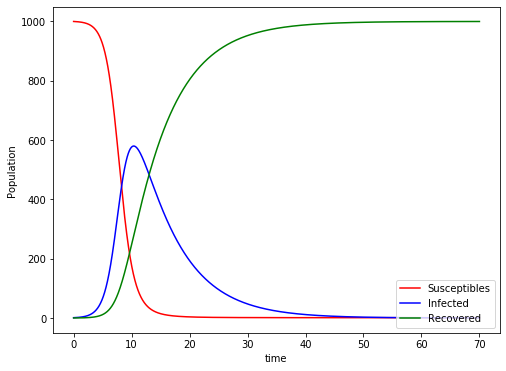

In [48]:
def SIR_model(X,t, beta, gamma):
    S, I, R = X[0], X[1], X[2]
    N = S+I+R
    dS = -beta*S*I/N
    dI = beta*S*I/N - gamma*I
    dR = gamma*I
    return [dS,dI,dR]



beta = 1.0
gamma = 1/7.0


X0 = [1000, 1, 0]

tspan = np.linspace(0, 70, 5000)
Xsol = odeint(SIR_model, X0, tspan, args=(beta,gamma,))

plt.figure(figsize=(8,6))
plt.plot(tspan, Xsol[:,0], 'r-', label="Susceptibles")
plt.plot(tspan, Xsol[:,1], 'b-', label="Infected")
plt.plot(tspan, Xsol[:,2], 'g-', label="Recovered")
plt.xlabel("time") 
plt.ylabel("Population") 
plt.legend(loc='lower right')
plt.show()


Although the SIR system looks quite simple, analytical solutions cannot easily be derived in general. Since this is a 3-dimensional system, it may be useful to first look at the "projected" phase space, where we eliminate one of the dependent variables by using the conserved quantity 
\begin{gather}
S+I+R = N
\end{gather}

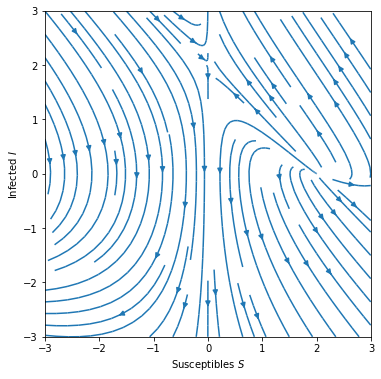

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

S, I  = np.meshgrid(np.linspace(-3.0, 3.0, 30), np.linspace(-3.0, 3.0, 30))

# since S + I + R = N, which is an invariant 2D plane, set up an initial N:  
N = 2


u = -S*I
v =  S*I + S + I - N


plt.figure(figsize=(6,6))
plt.streamplot(S, I, u, v)
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.xlabel('Susceptibles $S$')
plt.ylabel('Infected $I$')
plt.show()

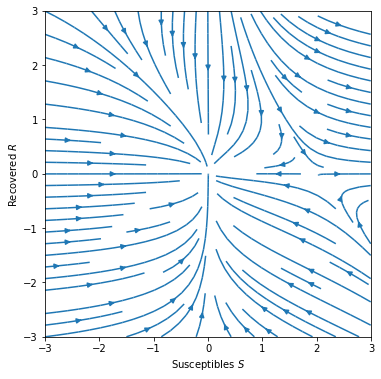

In [35]:
S, R  = np.meshgrid(np.linspace(-3.0, 3.0, 30), np.linspace(-3.0, 3.0, 30))

N=2

# x + y + z = c
#y = c - x - z 

U = -N*S + S*S + S*R
V = -R
 
plt.figure(figsize=(6,6))
plt.streamplot(S, R, U, V)
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.xlabel('Susceptibles $S$')
plt.ylabel('Recovered $R$')
plt.show()

We will now extend the SIR model in various ways, in order to best fit the dynamics of different infectious diseases. 

**Immunity window:**
one very simple modification of the SIR model is to remove the assumption of life-long immunity. It is indeed the case for many diseases (e.g. flu) that even after having recovered from the disease a person may contract it again at later time, because they have lost immunity. 

Therefore, we add an term in the equation for $R$ (and for $S$) that will account for the fact that a percentage of the Recovered population will eventually transition into being Susceptibles again.

\begin{align}
& S' = -\beta \frac{SI}{N} + \nu R \\
& I' = \beta \frac{SI}{N} - \gamma I \\
& R' = \gamma I - \nu R
\end{align}
where $\nu^{-1}>0$ is the average time for immunity. Notice that the total population $N$ still remains constat.


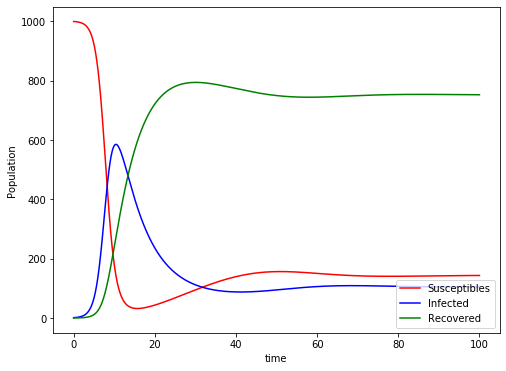

In [49]:
def SIR_immunity(X,t, beta, nu, gamma):
    S, I, R = X[0], X[1], X[2]
    N = S+I+R
    dS = -beta*S*I/N + nu*R
    dI = beta*S*I/N - gamma*I
    dR = gamma*I - nu*R
    return [dS,dI,dR]



beta = 1.0
gamma = 1/7.0
nu = 1/50.0


X0 = [1000, 1, 0]

tspan = np.linspace(0, 100, 5000)
Xsol = odeint(SIR_immunity, X0, tspan, args=(beta,nu, gamma,))


plt.figure(figsize=(8,6))
plt.plot(tspan, Xsol[:,0], 'r-', label="Susceptibles")
plt.plot(tspan, Xsol[:,1], 'b-', label="Infected")
plt.plot(tspan, Xsol[:,2], 'g-', label="Recovered")
plt.xlabel("time") 
plt.ylabel("Population") 
plt.legend(loc='lower right')
plt.show()

**Incubation period (SEIR model):**
another extension of the SIR model is the so-called SEIR model, where the incubation period is kept into account. 

We introduce a new category of people 
- $E$: exposed - individuals that have been infected, but they are not yet infectious themselves

When people are infected they will then move into the $E$ category rather than directly to $I$, and then gradually move over to the infected state $I$ where they can also infect others. The model for how susceptible people get
infected is kept exactly as in the ordinary SIR model
\begin{align}
& S' = -\beta \frac{SI}{N} + \nu R \\
& E' = \beta \frac{SI}{N} - \mu E \\
& I' = \mu E  - \gamma I \\
& R' = \gamma I - \nu R
\end{align}

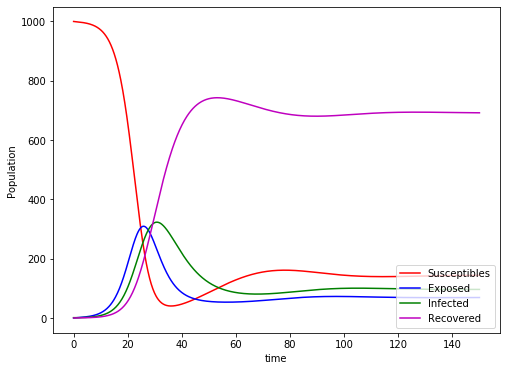

In [50]:
def SEIR_model(X,t, beta, nu, mu, gamma):
    S, E, I, R = X[0], X[1], X[2], X[3]
    N = S+I+R+E
    dS = -beta*S*I/N + nu*R
    dE = beta*S*I/N-mu*E
    dI = mu*E - gamma*I
    dR = gamma*I - nu*R
    return [dS,dE,dI,dR]



beta = 1.0
gamma = 1/7.0
nu = 1/50.0
mu = 1.0/5


X0 = [1000, 0, 1, 0]

tspan = np.linspace(0, 150, 1000)
Xsol = odeint(SEIR_model, X0, tspan, args=(beta,nu,mu,gamma,))


plt.figure(figsize=(8,6))
plt.plot(tspan, Xsol[:,0], 'r-', label="Susceptibles")
plt.plot(tspan, Xsol[:,1], 'b-', label="Exposed")
plt.plot(tspan, Xsol[:,2], 'g-', label="Infected")
plt.plot(tspan, Xsol[:,3], 'm-', label="Recovered")
plt.xlabel("time") 
plt.ylabel("Population") 
plt.legend(loc='lower right')
plt.show()

**COVID-19:**
the models considered above can typically be adapted to describe more complex disease behavior by adding more categories of people and possibly more interactions between the different categories. 

As a last example, we will consider an extension of the SEIR model into a model that has been used by Norwegian
health authorities to predict the spread of the 2020 COVID-19 pandemic (data and models can be found [here](https://github.com/folkehelseinstituttet/spread)). 

The real model that is used to provide COVID-19 predictions for health authorities is a *stochastic model* (e.g. parameters may be vary in time), however the (deterministic) model we will derive here has the same structure and for for certain choices of the model parameters the stochastic and deterministic models become equivalent. 


To describe COVID-19, the SEIR model introduced above is modified to incorporate two important features:
- *asymptomatic people*: a certain number of people infected with COVID-19 show no symptoms, but they can still infect other, although with a lower infectiousness than the symptomatic group
- *infecting before symptoms*: a large number of infections occur before the infector experiences symptoms, which suggests an additional exposed category where people are infectious but do not yet experience symptoms

In order to account for these features, we introduce new population categories
- $E$: exposed, but not infectious
- $E_i$: exposed and infectious
- $I_a$: infected, but asymptomatic

and we structure the model by subdiving it into two alternative disease trajectories: 
\begin{gather}
S \mapsto E \mapsto E_i \mapsto I \mapsto R \qquad \text{or} \qquad S \mapsto E \mapsto  I_a \mapsto R
\end{gather}

We are not adding the assumption that recovered people can contract COVID again in the future, simply because we want to analyze the early spreading of the disease, but this feature can be also added to the model.

Note that now the model has three categories of infectious people ($E_i$, $I$ and $I_a$) and they all interact with the $S$ category to create new infections (possibly with different infectious parameters).

\begin{align}
& S' = -\beta \frac{SI}{N} -r_{_{I_a}}\beta \frac{SI_a}{N} -r_{_{E_i}}\beta \frac{SE_i}{N} \\
& E' = \beta \frac{SI}{N} +r_{_{I_a}}\beta \frac{SI_a}{N} +r_{_{E_i}}\beta \frac{SE_i}{N} - \mu_1 E \\
& E_i' = \mu_1(1-p_a)E - \mu_2 E_i \\
& I' = \mu_2 E_i  - \gamma I \\
& I_a' = \mu_1 p_a E   - \gamma I_a \\
& R' = \gamma (I+I_a)
\end{align}
where $\beta, r_{_{I_a}}, r_{_{E_i}}$ are the infectiousness parameters, $p_a$ is the proportion of infected people that never develop symptoms, $\mu_1^{-1}$ is the mean duration of the non-infectious incubation period, where $\mu_2^{-1}$ and $\gamma^{-1}$ are the mean durations of the $E_i$ and $I$ phases (we also assumed that the duration of the $I_a$ period is the same as for $I$).

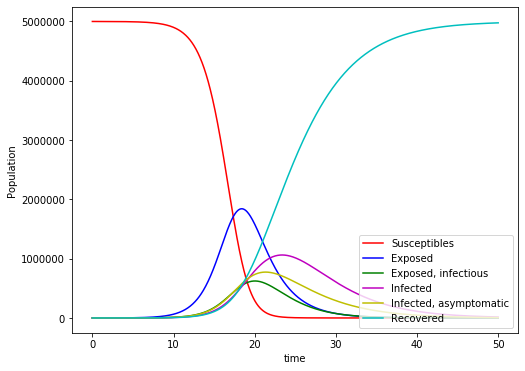

In [56]:
def earlyCOVID(X,t, beta, r_ia, r_ei, mu1, mu2, pa, gamma):
    S, E, Ei, I, Ia, R = X[0], X[1], X[2], X[3], X[4], X[5]
    N = sum(X)
    dS = -beta*S*I/N - r_ia*beta*S*Ia/N - r_ei*beta*S*Ei/N
    dE = beta*S*I/N + r_ia*beta*S*Ia/N + r_ei*beta*S*Ei/N - mu1*E
    dEi = mu1*(1-pa)*E - mu2*Ei
    dI = mu2*Ei - gamma*I
    dIa = mu1*pa*E - gamma*Ia
    dR = gamma*(I + Ia)
    return [dS,dE,dEi,dI,dIa,dR]



beta = 2.5; 
r_ia = 0.1; 
r_ei=1.25;
mu1=0.33; 
mu2=0.5; 
pa=0.4; 
gamma=0.2;

S_0 = 5e6
E_0 = 0
Ei_0 = 100
I_0 = 0
Ia_0 = 0
R_0 = 0
X0 = [S_0, E_0, Ei_0, I_0, Ia_0, R_0]


tspan = np.linspace(0, 50, 1000)
Xsol = odeint(earlyCOVID, X0, tspan, args=(beta, r_ia, r_ei, mu1, mu2, pa, gamma,))


plt.figure(figsize=(8,6))
plt.plot(tspan, Xsol[:,0], 'r-', label="Susceptibles")
plt.plot(tspan, Xsol[:,1], 'b-', label="Exposed")
plt.plot(tspan, Xsol[:,2], 'g-', label="Exposed, infectious")
plt.plot(tspan, Xsol[:,3], 'm-', label="Infected")
plt.plot(tspan, Xsol[:,4], 'y-', label="Infected, asymptomatic")
plt.plot(tspan, Xsol[:,5], 'c-', label="Recovered")
plt.xlabel("time") 
plt.ylabel("Population") 
plt.legend(loc='lower right')
plt.show()

#### References
Chapter  4 from J. Sundnes, *Solving ODE's in Python* [link](https://sundnes.github.io/solving_odes_in_python/).